# 実習3-1
### Convolutional Neural Network(CNN)でMnistデータの分類
### 単にMLPを使用した時より正答率が上昇するはず

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import time

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 10

In [3]:
# イメージサイズの設定
img_rows, img_cols = 28, 28

In [4]:
# tMnistデータをダウンロード。既に訓練データとテストデータに分割されている。
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#"K.image_data_format()がchannels_first"の場合、入力のshapeは(batch, channels, row, column)に変換,
#"K.image_data_format()がchannels_last"の場合，入力のshapeは(batch, row, column, channels)に変換。
#home/.keras/keras.jsonにchannels last or firstの情報があります。

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
#channels_lastになっている

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# 教師データ(y_train, y_test)をOne hotなベクトルへ変換する
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape = input_shape))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 437,482
Trainable params: 437,482
Non-trainable params: 0
________________________________________________

In [9]:
"""
# keras functional APIを使ったmodelの書き方
from keras.layers import Conv2D, MaxPooling2D, Input
from keras import layers
from keras import Model

# モデルの構築
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = layers.Dense(128, activation ='relu')(x)
x = Dropout(0.25)(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

# Modelクラスで入力テンソルと出力テンソルをモデルに変換する
model = Model(input_img, output_tensor)

model.summary()#モデルの内容を表示
"""

"\n# keras functional APIを使ったmodelの書き方\nfrom keras.layers import Conv2D, MaxPooling2D, Input\nfrom keras import layers\nfrom keras import Model\n\n# モデルの構築\ninput_img = Input(shape=(28, 28, 1))\nx = Conv2D(32, (3, 3), activation='relu')(input_img)\nx = Conv2D(32, (3, 3), activation='relu')(x)\nx = MaxPooling2D((2, 2), strides=(2, 2))(x)\nx = Dropout(0.25)(x)\nx = Flatten()(x)\nx = layers.Dense(128, activation ='relu')(x)\nx = Dropout(0.25)(x)\noutput_tensor = layers.Dense(10, activation='softmax')(x)\n\n# Modelクラスで入力テンソルと出力テンソルをモデルに変換する\nmodel = Model(input_img, output_tensor)\n\nmodel.summary()#モデルの内容を表示\n"

In [10]:
#計算を開始します。GPUを使ってないと、とても時間がかかります。
from keras.optimizers import SGD
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])

start = time.time() #処理を始めた時間を記録
hist = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
elapsed_time = time.time() - start #(処理時間)＝(処理が終わった時間)ー(処理を始めた時間)
print("計算時間:",elapsed_time,"秒") 

# lossとAccuracyを出す
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.7951 - accuracy: 0.7584 - val_loss: 0.3260 - val_accuracy: 0.9040
Epoch 2/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.2857 - accuracy: 0.9138 - val_loss: 0.2128 - val_accuracy: 0.9381
Epoch 3/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.2113 - accuracy: 0.9376 - val_loss: 0.1824 - val_accuracy: 0.9469
Epoch 4/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.1680 - accuracy: 0.9507 - val_loss: 0.1401 - val_accuracy: 0.9582
Epoch 5/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.1369 - accuracy: 0.9599 - val_loss: 0.1156 - val_accuracy: 0.9666
Epoch 6/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.1165 - accuracy: 0.9651 - val_loss: 0.1066 - val_accuracy: 0.9682
Epoch 7/10
60000/60000 [==============================] - 4s 67us/st

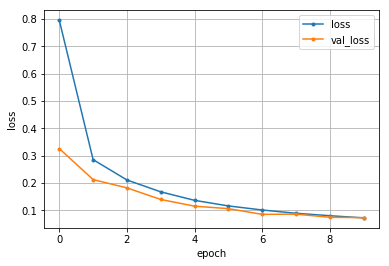

In [11]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# lossのグラフ
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

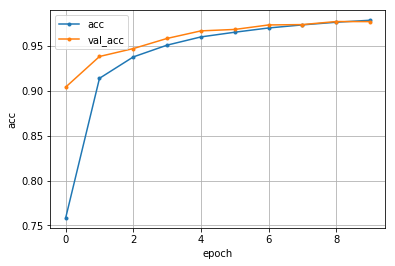

In [12]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# accuracyのグラフ
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [13]:
# 正誤表
print('Cross tabulation')
y_pred = model.predict_classes(X_test)
pd.crosstab(y_pred, y_test)

#列：実際の数字
#行：予想した数字
#予想した数字が正しければ、対角部分にカウントされる。

Cross tabulation


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,975,0,2,0,0,3,10,0,4,4
1,0,1118,1,0,0,0,3,1,0,3
2,0,3,1012,0,2,0,1,12,7,0
3,1,5,2,1000,0,18,2,7,18,5
4,0,0,1,0,961,0,5,1,3,9
5,2,2,0,3,0,865,6,0,5,2
6,0,2,1,0,2,3,929,0,2,1
7,1,1,7,2,3,0,0,999,4,1
8,1,4,6,2,0,0,2,1,926,0


In [14]:
# 実際に、間違った数字を見る。
test_wrong = [[i,ai,bi] for (i,(ai,bi)) in enumerate(zip(y_pred, y_test))
             if ai != bi]
#print(list(test_wrong))

print('間違ったデータの数は', len(test_wrong),'個です') #間違ったデータの数を表示
wrong = np.array(test_wrong)[0:,0]
print(wrong) #間違った画像の番号を表示

間違ったデータの数は 231 個です
[ 247  259  321  340  445  495  565  582  583  591  613  619  625  659
  684  691  707  740  844  900  947  956  959  965 1003 1014 1039 1112
 1181 1182 1226 1232 1242 1247 1248 1260 1289 1319 1364 1393 1464 1500
 1522 1527 1530 1553 1609 1671 1681 1709 1717 1721 1754 1790 1800 1850
 1878 1901 1941 2004 2016 2018 2024 2035 2044 2053 2070 2098 2118 2130
 2135 2168 2179 2182 2266 2272 2293 2325 2326 2387 2395 2406 2414 2425
 2447 2462 2488 2604 2607 2648 2654 2771 2810 2896 2915 2939 2953 2995
 3012 3030 3062 3073 3117 3130 3189 3206 3289 3405 3422 3475 3503 3520
 3550 3558 3559 3597 3629 3702 3718 3767 3780 3796 3811 3853 3869 3893
 3906 3926 3941 3951 3968 3976 4000 4063 4075 4078 4093 4123 4163 4176
 4212 4224 4238 4248 4271 4289 4313 4355 4360 4497 4536 4547 4578 4601
 4639 4690 4807 4814 4823 4863 4880 4956 4966 4978 5331 5457 5495 5600
 5634 5642 5734 5749 5842 5937 5955 5972 5973 5981 5982 5985 5997 6024
 6042 6043 6059 6505 6555 6560 6572 6597 6599 6625 6641 66

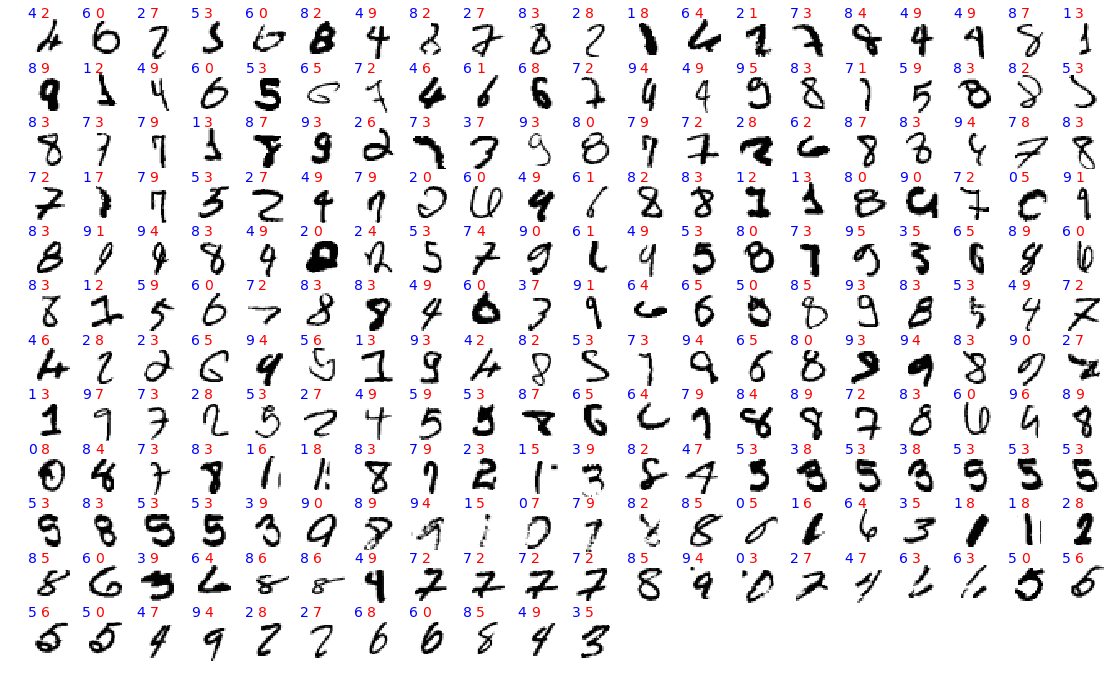

In [15]:
# 間違った画像を見る。
# 青ラベル：実際の数字；赤ラベル：間違えて予測した数字
plt.figure(figsize=(15, 15))
for ind, val in enumerate(wrong):
    plt.subplot(20,20,ind + 1)
    plt.axis("off")
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    im = 1 - X_test[val,:28,:28,0]  #画像の白黒反転
    plt.imshow(im, cmap='gray')
    plt.text(8, 0, test_wrong[ind][1], fontsize=14, color='red')
    plt.text(0, 0, test_wrong[ind][2], fontsize=14, color='blue')
plt.show()

In [16]:
#学習後のフィルターの可視化
# Kerasでは、以下のようにレイヤーごとのパラメータが取得できる
lays = model.layers # list of the layers
for i, l in enumerate(lays): #6層分の重みを表示
    print(i+1, l)
w1 = model.layers[0].get_weights()[0] # 1層目（i=0）のレイヤーのweights
b1 = model.layers[0].get_weights()[1] # とbiasのshape

print(w1.shape, b1.shape)
print(model.layers[0].get_weights()[0].shape) # 1層目（i=0）のレイヤー

1 <keras.layers.convolutional.Conv2D object at 0x7fe89137a588>
2 <keras.layers.convolutional.Conv2D object at 0x7fe89137a940>
3 <keras.layers.pooling.MaxPooling2D object at 0x7fe89137abe0>
4 <keras.layers.core.Flatten object at 0x7fe91fb188d0>
5 <keras.layers.core.Dense object at 0x7fe88ed2ec18>
6 <keras.layers.core.Dense object at 0x7fe88ed51978>
(5, 5, 1, 32) (32,)
(5, 5, 1, 32)


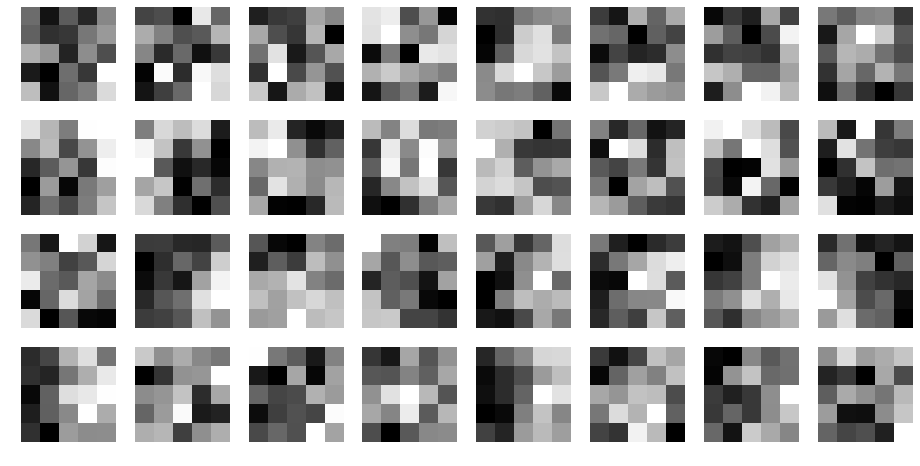

In [17]:
w1 = model.layers[0].get_weights()[0] # 1層目（i=0）のレイヤーのweights

plt.figure(figsize=(16, 8))
for ind, val in enumerate(w1.T):
    plt.subplot(4, 8, ind + 1)
    im = val.reshape((5, 5))
    plt.axis("off")
    plt.imshow(im, cmap='gray', interpolation='nearest')
plt.show()

## 課題3-1
#### convolution層を増やしてみたり、dropout率を変更してみてください。

## 課題3-2
#### 実習2-2を参考にしてcross validationを導入してみましょう。